## **Data Source :**
https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data import and understanding the data

In [2]:
netflix = pd.read_csv("03_netflix_titles_data.csv")

In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [6]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
netflix.describe(include='object').transpose()

,count,unique,top,freq
show_id,8807,8807,s3359,1
type,8807,2,Movie,6131
title,8807,8807,The Last Word,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [8]:
#netflix.describe(include='all')

In [1]:
#netflix["listed_in"].unique()

In [10]:
len(netflix["listed_in"].unique())

514

## Finding and filling NULL Values

In [11]:
netflix.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [12]:
netflix.fillna({"director": "Uncredited", "cast": "Uncredited", "country": "NA",
                      "date_added": "NA", "rating":"Not Rated", "duration":0},inplace= True )

In [13]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Movies Vs TV Shows

In [14]:
netflix["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [15]:
netflix["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

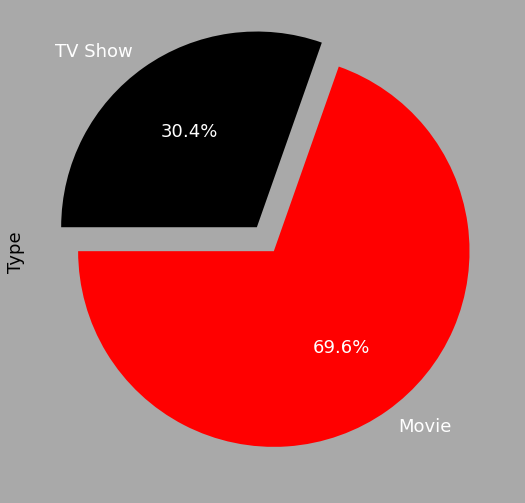

In [16]:

plt.figure(facecolor="#A9A9A9",figsize=(9,9))
(netflix["type"].value_counts()/len(netflix["type"]) *100).plot.pie(explode=(0, 0.15), colors =["red", "black"],
                       startangle=180,autopct='%1.1f%%',textprops={'color':"white"},fontsize=18)
plt.ylabel("Type",color="black", fontsize=18);

### Genre Wise Count

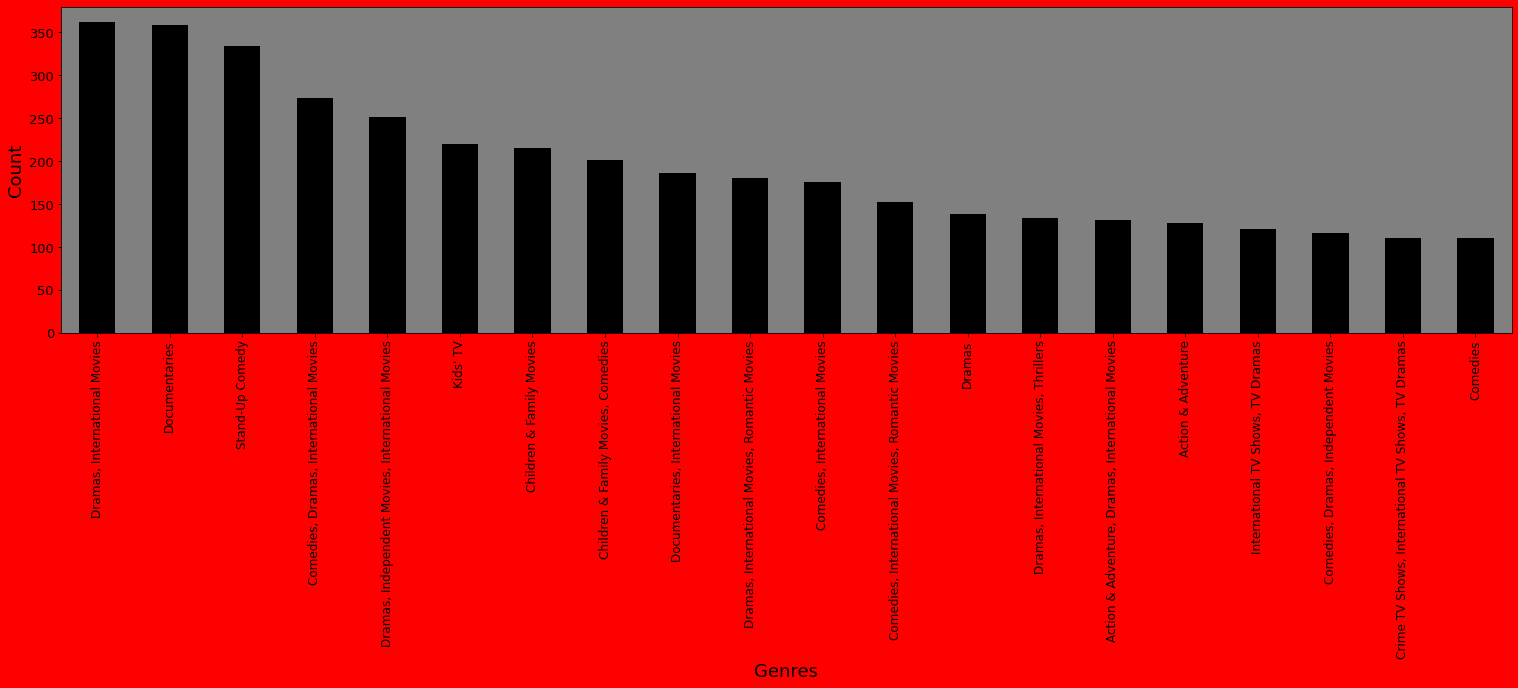

In [17]:
plt.figure(figsize=(26,6),facecolor="red")
plt.axes().set_facecolor("grey")
netflix["listed_in"].value_counts().head(20).plot(kind="bar",color ="black")
plt.xlabel("Genres",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 12 )
plt.yticks(fontsize= 13 );

### Rating Wise Counts

In [18]:
netflix["rating"].value_counts()

TV-MA        3207
TV-14        2160
TV-PG         863
R             799
PG-13         490
TV-Y7         334
TV-Y          307
PG            287
TV-G          220
NR             80
G              41
TV-Y7-FV        6
Not Rated       4
NC-17           3
UR              3
84 min          1
66 min          1
74 min          1
Name: rating, dtype: int64

### Data Cleanup


**We can see that Ratings are having duration values. Data clean up needed**

    - Find the rows with wrong values.
    - Change rating to "Unrated"
    - Change corresponding "duration" to 74 min, 84 min, 66 min respectively.



In [19]:
netflix[netflix["rating"].isin(["74 min","84 min","66 min"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,0,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,0,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,0,Movies,The comic puts his trademark hilarious/thought...


In [20]:
netflix["rating"].replace(["74 min","84 min","66 min"], "NR", inplace= True)

In [21]:
netflix.loc[[5541,5794,5813],"duration"]=["74 min","84 min","66 min"]

### Re-check the updated rows

In [22]:
netflix.loc[[5541,5794,5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NR,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NR,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NR,66 min,Movies,The comic puts his trademark hilarious/thought...


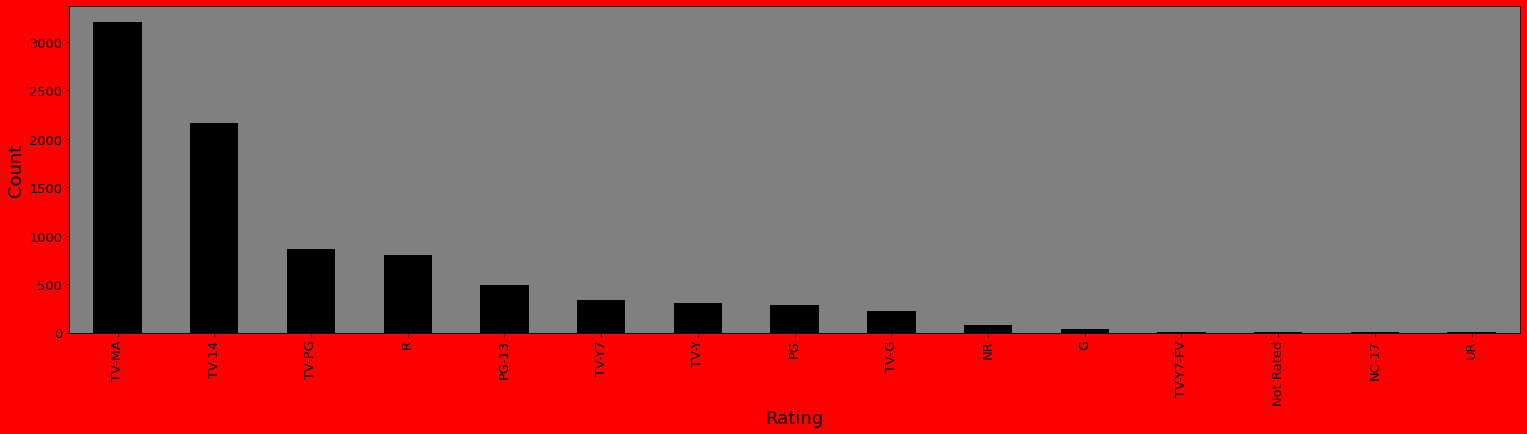

In [23]:
plt.figure(figsize=(26,6),facecolor="red")
plt.axes().set_facecolor("grey")
netflix["rating"].value_counts().plot(kind="bar",color ="black")
plt.xlabel("Rating",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 13 )
plt.yticks(fontsize= 13 );

### Release Year Wise

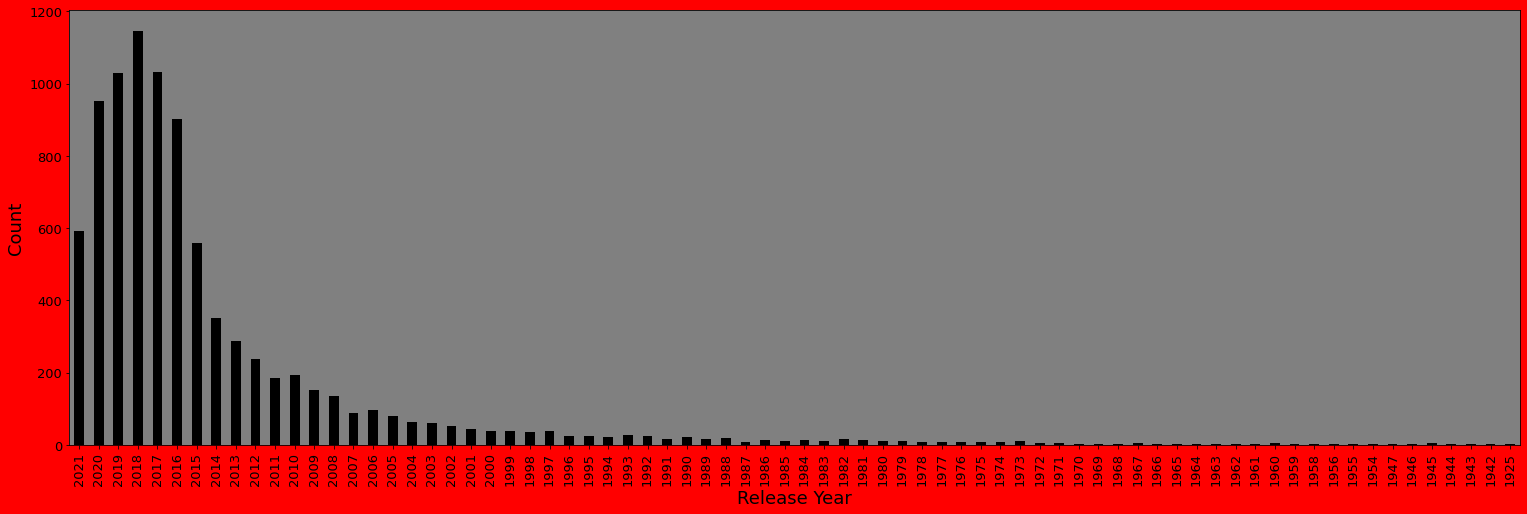

In [24]:
plt.figure(figsize=(26,8),facecolor="red")
plt.axes().set_facecolor("grey")
netflix["release_year"].value_counts().sort_index(ascending=False).plot(kind="bar",color ="black")
plt.xlabel("Release Year",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 13 )
plt.yticks(fontsize= 13 );

In [25]:
netflix["release_year"].value_counts().sort_index(ascending=False)[:10]

2021     592
2020     953
2019    1030
2018    1147
2017    1032
2016     902
2015     560
2014     352
2013     288
2012     237
Name: release_year, dtype: int64

### Diving Deeper, How many were TV shows vs Movies in these years?

In [26]:
netflix.groupby(["release_year","type"]).count().sort_values(by="release_year",ascending =False)[:20]["show_id"]

release_year  type   
2021          TV Show    315
              Movie      277
2020          TV Show    436
              Movie      517
2019          TV Show    397
              Movie      633
2018          TV Show    380
              Movie      767
2017          TV Show    265
              Movie      767
2016          TV Show    244
              Movie      658
2015          TV Show    162
              Movie      398
2014          TV Show     88
              Movie      264
2013          TV Show     63
              Movie      225
2012          TV Show     64
              Movie      173
Name: show_id, dtype: int64

### Duration of Movies

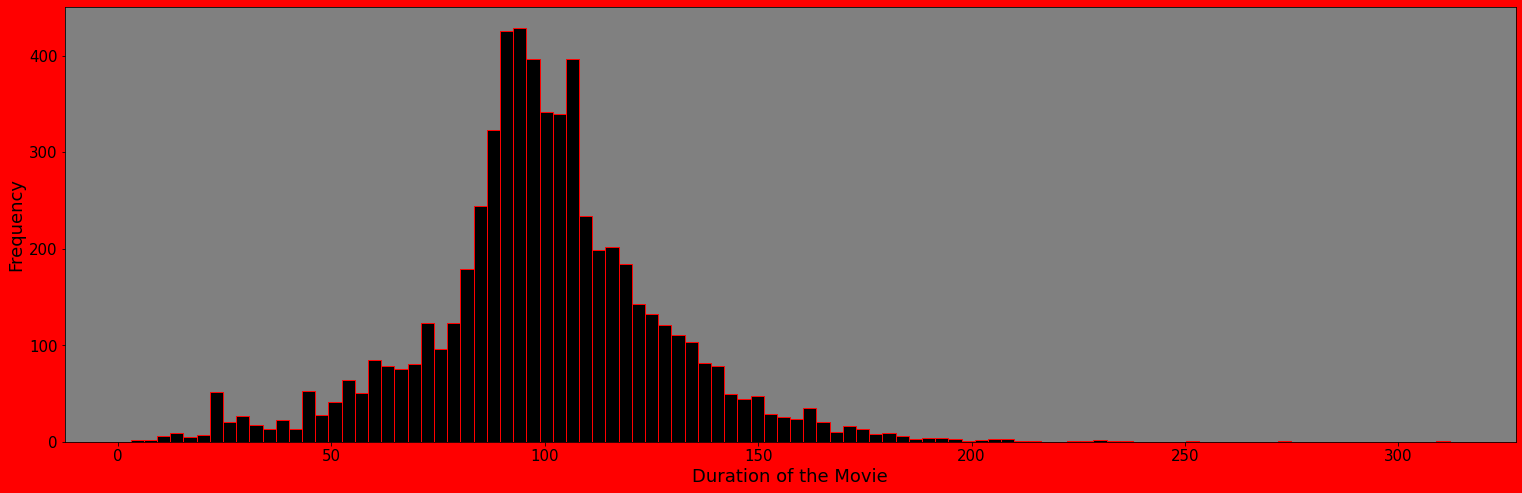

In [27]:
plt.figure(figsize=(26,8),facecolor="red")
plt.axes().set_facecolor("grey")
netflix[netflix["type"]=="Movie"]["duration"].str.split(" ", expand= True)[0].astype(float).plot(kind="hist",color ="black",edgecolor ="red",bins=100)
plt.xlabel("Duration of the Movie",fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 );

### TV Shows by number of Seasons

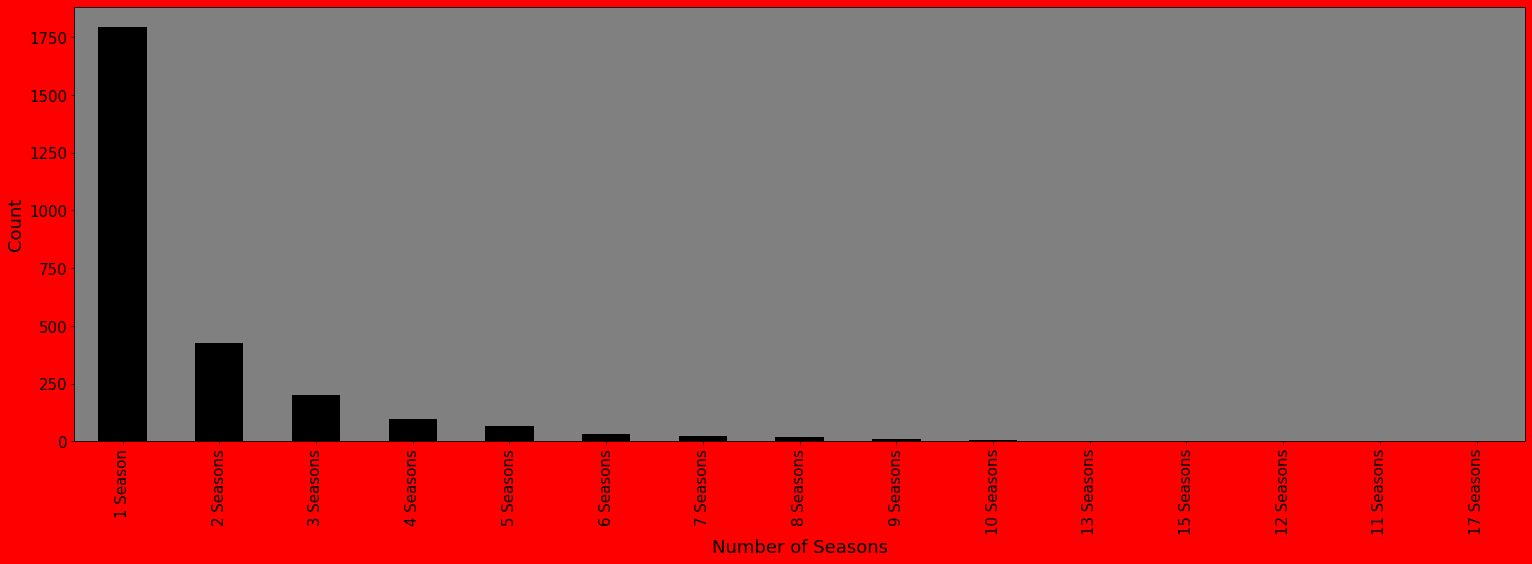

In [28]:
plt.figure(figsize=(26,8),facecolor="red")
plt.axes().set_facecolor("grey")
netflix[netflix["type"]=="TV Show"]["duration"].value_counts().plot(kind="bar",color ="black")
plt.xlabel("Number of Seasons",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 );

### Find out TV shows with 10 Seasons or more

In [29]:
netflix[netflix["type"]=="TV Show"]["duration"].value_counts().index

Index(['1 Season', '2 Seasons', '3 Seasons', '4 Seasons', '5 Seasons',
       '6 Seasons', '7 Seasons', '8 Seasons', '9 Seasons', '10 Seasons',
       '13 Seasons', '15 Seasons', '12 Seasons', '11 Seasons', '17 Seasons'],
      dtype='object')

In [30]:
netflix[netflix["duration"].isin(['10 Seasons','13 Seasons', '15 Seasons', '12 Seasons', '11 Seasons', '17 Seasons'])][["title","duration"]].sort_values("duration", ascending= False)

,title,duration
548,Grey's Anatomy,17 Seasons
4798,NCIS,15 Seasons
2423,Supernatural,15 Seasons
4220,COMEDIANS of the world,13 Seasons
7847,Red vs. Blue,13 Seasons
1354,Heartland,13 Seasons
4964,Trailer Park Boys,12 Seasons
5412,Criminal Minds,12 Seasons
6456,Cheers,11 Seasons
6795,Frasier,11 Seasons


### Country Wise Split up

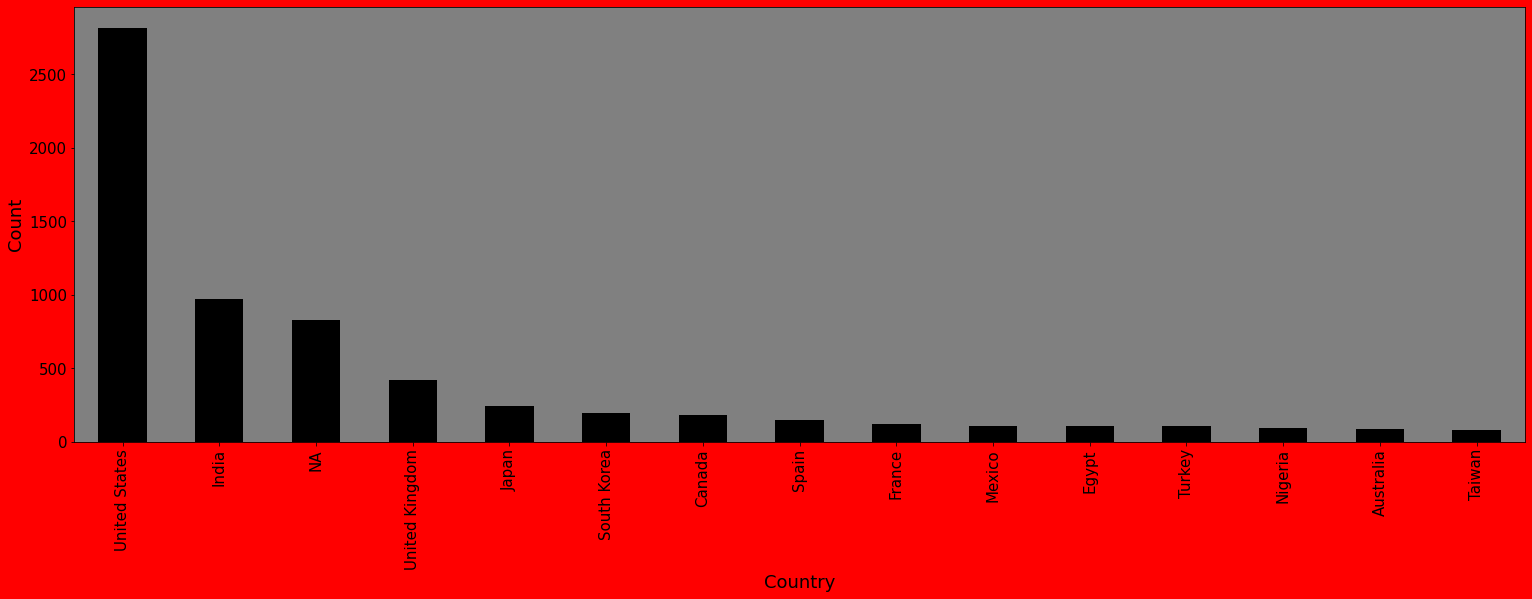

In [31]:
plt.figure(figsize=(26,8),facecolor="red")
plt.axes().set_facecolor("grey")
netflix["country"].value_counts().head(15).plot(kind="bar",color ="black")
plt.xlabel("Country",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 );

### BIVARIATE ANALYSIS using Seaborn plots¶


In [32]:
import seaborn as sns

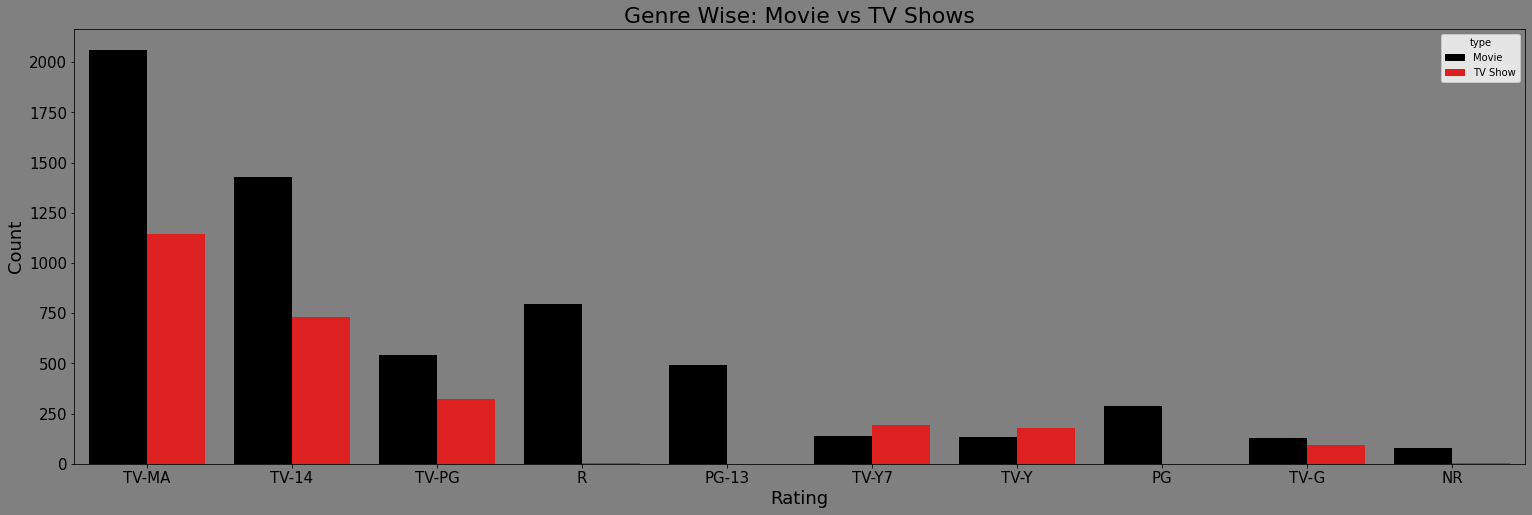

In [33]:
plt.figure(figsize=(26,8),facecolor="grey")
plt.axes().set_facecolor("grey")
sns.countplot(data=netflix, x= "rating", hue ="type", palette=["black", "red"], order=netflix["rating"].value_counts().index[:10] )
plt.xlabel("Rating",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 )
plt.title("Genre Wise: Movie vs TV Shows", fontsize= 22);

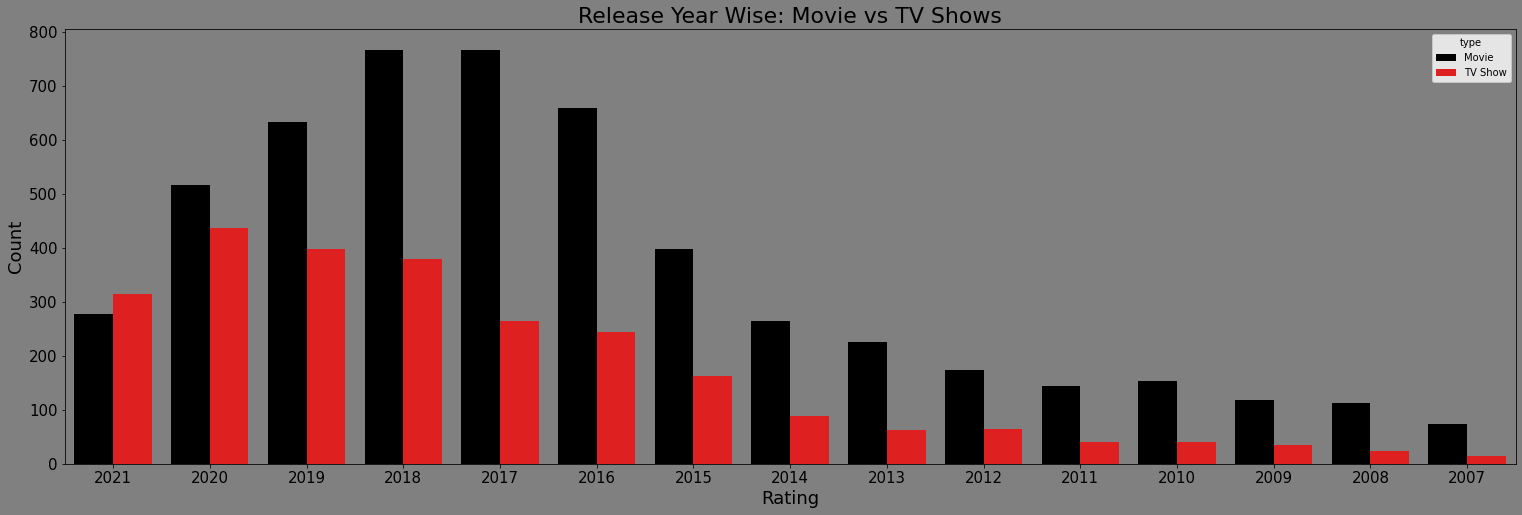

In [34]:
plt.figure(figsize=(26,8),facecolor="grey")
plt.axes().set_facecolor("grey")
sns.countplot(data=netflix, x= "release_year", hue ="type", palette=["black", "red"],order=netflix["release_year"].value_counts().index.sort_values(ascending=False)[:15])
plt.xlabel("Rating",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 )
plt.title("Release Year Wise: Movie vs TV Shows", fontsize= 22);

In [35]:
len(netflix[netflix["date_added"]=="NA"])

10

### Converting a "date_added" column  to a Datetime Index

In [36]:
netflix["date_added"] = pd.to_datetime(netflix["date_added"],errors= "coerce")

In [37]:
netflix = netflix.set_index("date_added")

### Number of titles added per year

In [38]:
netflix.resample("A").count()["show_id"]

date_added
2008-12-31       2
2009-12-31       2
2010-12-31       1
2011-12-31      13
2012-12-31       3
2013-12-31      11
2014-12-31      24
2015-12-31      82
2016-12-31     429
2017-12-31    1188
2018-12-31    1649
2019-12-31    2016
2020-12-31    1879
2021-12-31    1498
Name: show_id, dtype: int64

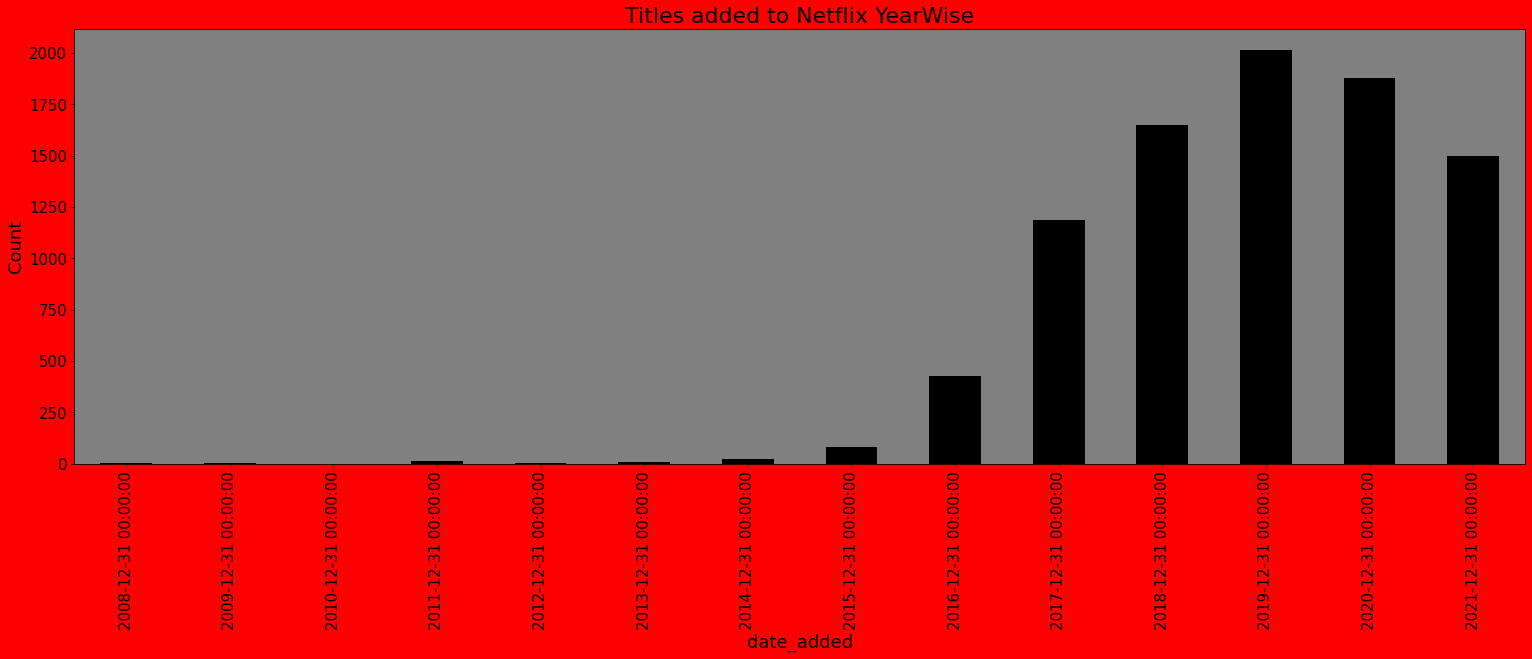

In [39]:
plt.figure(figsize=(26,8),facecolor="red")
plt.axes().set_facecolor("grey")
plt.xlabel("Year End",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 )
netflix.resample("A").count()["show_id"].plot(kind="bar",color ="black")
plt.title("Titles added to Netflix YearWise", fontsize= 22);

### Number of titles added monthwise

<ipython-input-40-fa3e350d06f1>:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  netflix.loc["2015":"2021"].resample("M").count()["show_id"].plot(color ="black")


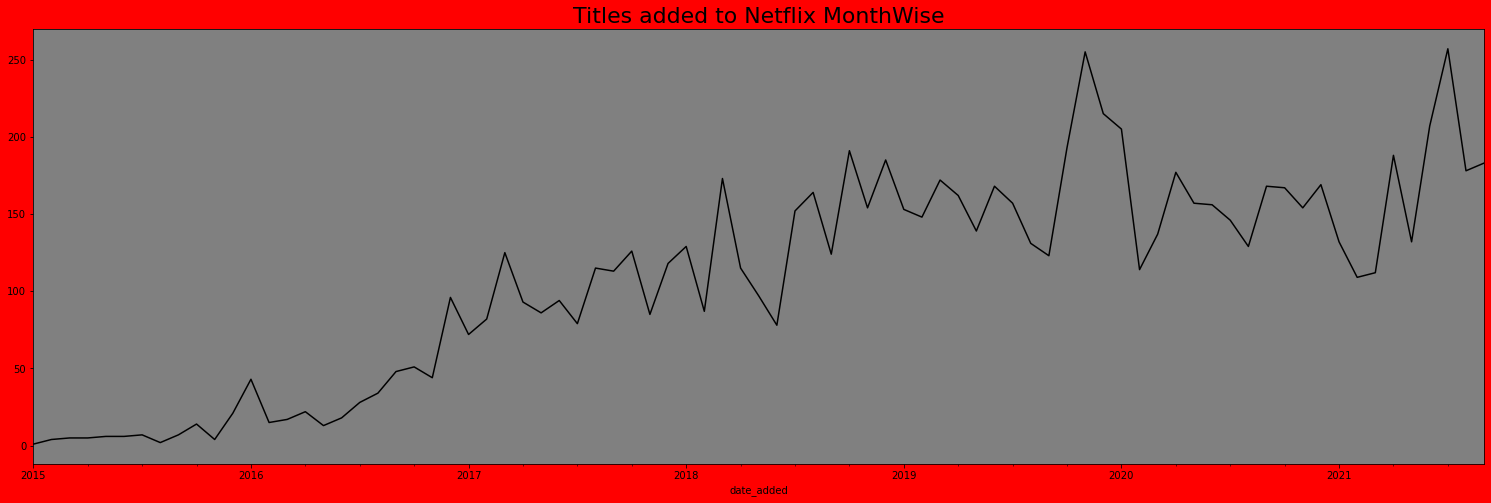

In [40]:
plt.figure(figsize=(26,8),facecolor="red")
plt.axes().set_facecolor("grey")
netflix.loc["2015":"2021"].resample("M").count()["show_id"].plot(color ="black")
plt.title("Titles added to Netflix MonthWise", fontsize= 22);